**Step 0: Explain the problem you are going to solve using the selected data. Note the problem must be a fit to utilize ML.**<br>
Predicting the heart attack on the basis of certain parameters like chest pain type, chest pain location, resting blood pressure, etc.

**Step 1.1: Find a public dataset in a domain you like. This dataset must be  have the following features.**

Dataset location: https://archive.ics.uci.edu/ml/datasets/Heart+Disease
The data which is used here, is a subset of the data present in the URL above. In this, 13 most prominent features out of 76 are taken to predict the target. The features are selected on the basis of all published experiments[1][2][3].

---

**1- There is a possibility of finding versions of the data.** <br>

There are chances of getting different versions of data in the UCI Repository.

---


**2- Possibility of change in the data.** 

UCI is responsible for change in data

---


**3- Possibility of receiving future updated on the data.**

UCI is responsible for any update in data

---



**4- Have at least two protected features.**<br>
  The two protected features are:<br>
  -- age<br>
  -- sex

**Step 1.3: Define some business metrics to evaluate your model.**<br>
-- False Negatives = 0<br>
Since we are dealing with heart disease(attack) data, there should not be any False Negative. False negatives are those outputs(not possible with heart attack disease) but actually they were.<br>
This will help in diagnosing each and every patient who is prone to heart attack and thus, preventive measure could be taken in time. This will not only impact positively on health of citizens but its associated financial cost too.<br><br>
-- False Positives < 5%<br>
This means that only False positives, and that too less than 5% , could be entertained which can fall under the umbrella of our goals.<br>
It is so because any datapoint which is identified positively will be entertained by a human executive. It has an associated cost will be bore by the organization.

**Step 1.4: Define some software metrics to evaluate your model.**<br>
  -- Extremely low latency – the model should provide results in almost real time.<br>
  -- Available computation space for upcoming versions<br>
  -- There shouldn’t be any cyclomatic complexity in the code and every module should follow SRP(Single Responsibility Principle)<br>
  -- Miminal code smells without any architecture smells.

**Step 2.1**


---


**Describe the dataset objective and the features made you decide on selecting it.**<br>

The dataset objective is to predict the probability of getting a heart attack based on certain factors.It has rich features which are highly relatable and the objective can make an impact on society.

---
**Describe the quality of dataset using a radar chart with enough explanation.**
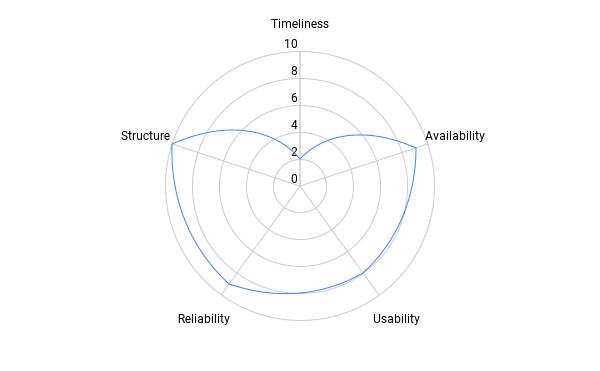

<br>
Dataset is highly structured but regarding the timeliness, it cannot be criticised because there is no field in the data which can tell about the data. It is easily available in the UCI Repository and proves to be highly reliable as it used by many researchers for various findings and technological advancement in the field of cardiology.

**Step 2.2: upload your data in a public repo on https://git-lfs.github.com/**<br>
Github URL: https://github.com/Chanpreet-Singh/csci-5901-final-project.git 

**Step 3: What are the features in your dataset? what is the target variable?**<br>
Explanations of data features:<br>
1. *age* - age(in years)<br>
2. *sex* - sex (1 = male; 0 = female)<br>
3. *cp* - chest pain type<br>
   -- Value 1: typical angina<br>
   -- Value 2: atypical angina<br>
   -- Value 3: non-anginal pain<br>
   -- Value 4: asymptomatic<br>
4. *trestbps* - resting blood pressure (in mm Hg on admission to the hospital)<br>
5. *chol* - serum cholestoral in mg/dl<br>
6. *fbs* - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)<br>
7. *restecg* - esting electrocardiographic results<br>
   -- Value 0: normal<br>
   -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
   -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria<br>
8. *thalach* - maximum heart rate achieved<br>
9. *exang* - exercise induced angina (1 = yes; 0 = no)<br>
10. *oldpeak* - ST depression induced by exercise relative to rest<br>
11. *slope* - the slope of the peak exercise ST segment<br>
  -- Value 0: upsloping<br>
  -- Value 1: flat<br>
  -- Value 2: downsloping<br>
12. *ca* - number of major vessels (0-3) colored by flourosopy<br>
13. *thal* - Thalassemia<br>
  -- Value 0: normal<br>
  -- Value 1: fixed defect<br>
  -- Value 2: reversable defect<br>
<br>

***target*** - the output variable<br>
 -- Value 0: less chance of heart attack<br>
 -- Value 1: more chance of heart attack<br>

**Data Cleaning and Exploration**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


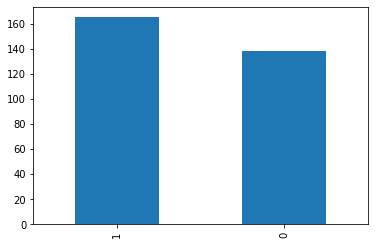

In [5]:
df['target'].value_counts().plot(kind='bar')

The graph plotted above signifies that the data is balanced, so should proceed with the model development.

In [6]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [7]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The data doesn't contain any null values.

In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

The data doesn't contain any duplicate values.

**Feature Importance**

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [10]:
y = df['target']
X = df.drop(['target'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
rnd_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

[0.05041461 0.03136511 0.08429118 0.03825709 0.03846521 0.01320951
 0.01608199 0.07589178 0.07343898 0.07902416 0.05210555 0.06471855
 0.07302187]


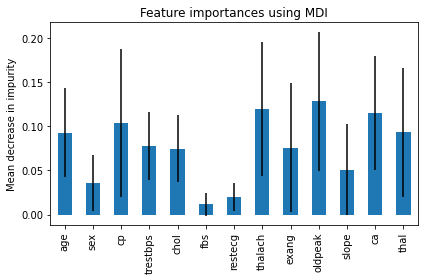

In [12]:
importances = rnd_clf.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns)
fig, ax = plt.subplots()
std = np.std([tree.feature_importances_ for tree in rnd_clf.estimators_], axis=0)
print(std)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

**Step 4: Among the features what are the features with more predictive value?**<br>
The above diagram signifies that- oldpeak, thalach and ca have more importance than others, hence more preditive values.

**Step 5: Identify all protected features? (for example in some domains we can say Gender is a protective feature.)**<br>
The two protected features are:
1.   age
2.   sex

**Step 6: Build a model to predict your target value.**

**Random Forest**

In [13]:
rf_predictions = rnd_clf.predict(X_test)
print(classification_report(y_test, rf_predictions))


              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



**Decision Tree Classifier**

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
p = classifier.predict(X_test)
print(classification_report(y_test, p))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



**Neural Network**


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from numpy import unique
from numpy import argmax
n_class = 2
n_features = X.shape[1]


nn_model = Sequential()
nn_model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
nn_model.add(Dense(10, activation='softmax'))
nn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
nn_model.fit(X_train, y_train, epochs=120, batch_size=8)

Epoch 1/120
31/31 [==============================] - 0s 2ms/step - loss: 132.6375
Epoch 2/120
31/31 [==============================] - 0s 2ms/step - loss: 96.8825
Epoch 3/120
31/31 [==============================] - 0s 2ms/step - loss: 66.7088
Epoch 4/120
31/31 [==============================] - 0s 2ms/step - loss: 39.0244
Epoch 5/120
31/31 [==============================] - 0s 2ms/step - loss: 12.9766
Epoch 6/120
31/31 [==============================] - 0s 2ms/step - loss: 4.0004
Epoch 7/120
31/31 [==============================] - 0s 2ms/step - loss: 3.4073
Epoch 8/120
31/31 [==============================] - 0s 2ms/step - loss: 3.0573
Epoch 9/120
31/31 [==============================] - 0s 2ms/step - loss: 3.0035
Epoch 10/120
31/31 [==============================] - 0s 2ms/step - loss: 2.6687
Epoch 11/120
31/31 [==============================] - 0s 2ms/step - loss: 2.5790
Epoch 12/120
31/31 [==============================] - 0s 2ms/step - loss: 2.4546
Epoch 13/120
31/31 [===========

In [24]:
nn_pred = nn_model.predict(X_test)
nn_pred = argmax(nn_pred, axis=-1).astype('int')
nn_acc = classification_report(y_test, nn_pred)
print(nn_acc)

2/2 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.87      0.84      0.86        32
           6       0.00      0.00      0.00         0

    accuracy                           0.85        61
   macro avg       0.58      0.57      0.57        61
weighted avg       0.87      0.85      0.86        61



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Step 7: Explain what model you utilized and the reason of choosing it.**
Neural Network(Sequential) Classifier is giving us best accuracy among all hence we will be going ahead with this model only for final results.

It is also satisfying our the most prominent business metric that False Negative should be tending to 0.

**Step 8: using the identified ML metrics evaluate your model.**

In [25]:
print(nn_acc)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.87      0.84      0.86        32
           6       0.00      0.00      0.00         0

    accuracy                           0.85        61
   macro avg       0.58      0.57      0.57        61
weighted avg       0.87      0.85      0.86        61



**Step 9: Perform error analysis on your dataset and try to improve the performance of your solution by investigating the samples in your dataset.**

In [26]:
print("These rows might be erroneous:")
for ind, each in X_test.iterrows():
  pred = nn_model.predict(X[ind:ind+1])
  pred = argmax(pred, axis=-1).astype('int')
  if pred[0] != y_test[ind]:
    print("Row Number: {var}".format(var=ind))
print("\n\nSince this is a medical dataset, thus a medical domain specialist(preferably a cardiologist) might be required for the data re-curation")

These rows might be erroneous:
1/1 [==============================] - 0s 15ms/step
Row Number: 228
1/1 [==============================] - 0s 15ms/step
Row Number: 111
1/1 [==============================] - 0s 13ms/step
Row Number: 101
1/1 [==============================] - 0s 14ms/step
Row Number: 283
1/1 [==============================] - 0s 17ms/step
Row Number: 254
1/1 [==============================] - 0s 19ms/step
Row Number: 139
1/1 [==============================] - 0s 14ms/step
Row Number: 42
1/1 [==============================] - 0s 13ms/step
Row Number: 92
1/1 [==============================] - 0s 16ms/step
Row Number: 281
1/1 [==============================] - 0s 13ms/step


Since this is a medical dataset, thus a medical domain specialist(preferably a cardiologist) might be required for the data re-curation


**Step 10: evaluate the fairness of your model. Use subsets of data to assess the fairness in regards to the protected features**

In [27]:
print("When sex=1(Male), age <= 25")
filtered_df = df[(df.sex == 1) & (df.age <= 25)]
if not filtered_df.empty:
  sample_df = filtered_df.sample()
  for ind, each in sample_df.iterrows():
    pred = nn_model.predict(X[ind:ind+1])
    pred = argmax(pred, axis=-1).astype('int')
    if pred[0] != y[ind]:
      print("The model looks biased for row: {0}\n".format(ind))
    else:
      print("No biasing for the particular filter\n")
else:
  print("No data\n")

print("When sex=1(Male), age is between 25 and 40")
filtered_df = df[(df.sex == 1) & (df.age > 25) & (df.age <= 40)]
if not filtered_df.empty:
  sample_df = filtered_df.sample()
  for ind, each in sample_df.iterrows():
    pred = nn_model.predict(X[ind:ind+1])
    pred = argmax(pred, axis=-1).astype('int')
    if pred[0] != y[ind]:
      print("The model might be biased for row: {0}\n".format(ind))
    else:
      print("No biasing for the particular filter\n")
else:
  print("No data\n")


print("When sex=1(Male), age > 40")
filtered_df = df[(df.sex == 1) & (df.age > 40)]
if not filtered_df.empty:
  sample_df = filtered_df.sample()
  for ind, each in sample_df.iterrows():
    pred = nn_model.predict(X[ind:ind+1])
    pred = argmax(pred, axis=-1).astype('int')
    if pred[0] != y[ind]:
      print("The model might be biased for row: {0}\n".format(ind))
    else:
      print("No biasing for the particular filter\n")
else:
  print("No data\n")



print("When sex=0(Female), age <= 25")
filtered_df = df[(df.sex == 0) & (df.age <= 25)]
if not filtered_df.empty:
  sample_df = filtered_df.sample()
  for ind, each in sample_df.iterrows():
    pred = nn_model.predict(X[ind:ind+1])
    pred = argmax(pred, axis=-1).astype('int')
    if pred[0] != y[ind]:
      print("The model might be biased for row: {0}\n".format(ind))
    else:
      print("No biasing for the particular filter\n")
else:
  print("No data\n")


print("When sex=0(Female), age is between 25 and 40")
filtered_df = df[(df.sex == 0) & (df.age > 25) & (df.age <= 40)]
if not filtered_df.empty:
  sample_df = filtered_df.sample()
  for ind, each in sample_df.iterrows():
    pred = nn_model.predict(X[ind:ind+1])
    pred = argmax(pred, axis=-1).astype('int')
    if pred[0] != y[ind]:
      print("The model might be biased for row: {0}\n".format(ind))
    else:
      print("No biasing for the particular filter\n")
else:
  print("No data\n")


print("When sex=0(Female), age > 40")
filtered_df = df[(df.sex == 0) & (df.age > 40)]
if not filtered_df.empty:
  sample_df = filtered_df.sample()
  for ind, each in sample_df.iterrows():
    pred = nn_model.predict(X[ind:ind+1])
    pred = argmax(pred, axis=-1).astype('int')
    if pred[0] != y[ind]:
      print("The model might be biased for row: {0}\n".format(ind))
    else:
      print("No biasing for the particular filter\n")
else:
  print("No data\n")



When sex=1(Male), age <= 25
No data

When sex=1(Male), age is between 25 and 40
1/1 [==============================] - 0s 23ms/step
The model might be biased for row: 259

When sex=1(Male), age > 40
1/1 [==============================] - 0s 16ms/step
No biasing for the particular filter

When sex=0(Female), age <= 25
No data

When sex=0(Female), age is between 25 and 40
1/1 [==============================] - 0s 14ms/step
No biasing for the particular filter

When sex=0(Female), age > 40
1/1 [==============================] - 0s 16ms/step
No biasing for the particular filter



**Step 11: build a pipeline to ingest your data, train the model and deploy it in a specific folder.**<br>
Following is the code - implementing tfx pipeline. 

In [3]:
!pip install --upgrade pip
!pip install -U tfx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 34.5 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 90.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.6/23.6 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [28]:
import tensorflow as tf
print('TensorFlow version: {}'.format(tf.__version__))
from tfx import v1 as tfx
print('TFX version: {}'.format(tfx.__version__))

TensorFlow version: 2.9.1
TFX version: 1.9.1


In [29]:
import os

PIPELINE_NAME = "chanpreet-aml-final-project"

# Output directory to store artifacts generated from the pipeline.
PIPELINE_ROOT = os.path.join('pipelines', PIPELINE_NAME)
# Path to a SQLite DB file to use as an MLMD storage.
METADATA_PATH = os.path.join('metadata', PIPELINE_NAME, 'metadata.db')
# Output directory where created models from the pipeline will be exported.
SERVING_MODEL_DIR = os.path.join('serving_model', PIPELINE_NAME)

from absl import logging
logging.set_verbosity(logging.INFO)  # Set default logging level.

In [30]:
df = df.astype(float)
df['target'] = df['target'].astype(int)

In [31]:
import urllib.request
import tempfile

DATA_ROOT = tempfile.mkdtemp(prefix='tfx-data')  # Create a temporary directory.
# _data_url = 'https://raw.githubusercontent.com/Chanpreet-Singh/csci-5901-final-project/main/heart.csv'
df.to_csv(os.path.join(DATA_ROOT, "data.csv"), index=False)
_data_filepath = os.path.join(DATA_ROOT, "data.csv")

In [32]:
_trainer_module_file = 'data_trainer.py'

In [33]:
%%writefile {_trainer_module_file}

from typing import List
from absl import logging
import tensorflow as tf
from tensorflow import keras
from tensorflow_transform.tf_metadata import schema_utils

from tfx import v1 as tfx
from tfx_bsl.public import tfxio
from tensorflow_metadata.proto.v0 import schema_pb2

_FEATURE_KEYS = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
_LABEL_KEY = 'target'

_TRAIN_BATCH_SIZE = 20
_EVAL_BATCH_SIZE = 10

# Since we're not generating or creating a schema, we will instead create
# a feature spec.  Since there are a fairly small number of features this is
# manageable for this dataset.
_FEATURE_SPEC = {
    **{
        feature: tf.io.FixedLenFeature(shape=[1], dtype=tf.float32)
           for feature in _FEATURE_KEYS
       },
    _LABEL_KEY: tf.io.FixedLenFeature(shape=[1], dtype=tf.int64)
}


def _input_fn(file_pattern: List[str],
              data_accessor: tfx.components.DataAccessor,
              schema: schema_pb2.Schema,
              batch_size: int = 200) -> tf.data.Dataset:
  """Generates features and label for training.

  Args:
    file_pattern: List of paths or patterns of input tfrecord files.
    data_accessor: DataAccessor for converting input to RecordBatch.
    schema: schema of the input data.
    batch_size: representing the number of consecutive elements of returned
      dataset to combine in a single batch

  Returns:
    A dataset that contains (features, indices) tuple where features is a
      dictionary of Tensors, and indices is a single Tensor of label indices.
  """
  return data_accessor.tf_dataset_factory(
      file_pattern,
      tfxio.TensorFlowDatasetOptions(
          batch_size=batch_size, label_key=_LABEL_KEY),
      schema=schema).repeat()


def _build_keras_model() -> tf.keras.Model:
  """Creates a DNN Keras model for classifying penguin data.

  Returns:
    A Keras Model.
  """
  # The model below is built with Functional API, please refer to
  # https://www.tensorflow.org/guide/keras/overview for all API options.
  inputs = [keras.layers.Input(shape=(1,), name=f) for f in _FEATURE_KEYS]
  d = keras.layers.concatenate(inputs)
  for _ in range(2):
    d = keras.layers.Dense(8, activation='relu')(d)
  outputs = keras.layers.Dense(3)(d)

  model = keras.Model(inputs=inputs, outputs=outputs)
  model.compile(
      optimizer=keras.optimizers.Adam(1e-2),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=[keras.metrics.SparseCategoricalAccuracy()])

  model.summary(print_fn=logging.info)
  return model


# TFX Trainer will call this function.
def run_fn(fn_args: tfx.components.FnArgs):
  """Train the model based on given args.

  Args:
    fn_args: Holds args used to train the model as name/value pairs.
  """

  # This schema is usually either an output of SchemaGen or a manually-curated
  # version provided by pipeline author. A schema can also derived from TFT
  # graph if a Transform component is used. In the case when either is missing,
  # `schema_from_feature_spec` could be used to generate schema from very simple
  # feature_spec, but the schema returned would be very primitive.
  schema = schema_utils.schema_from_feature_spec(_FEATURE_SPEC)

  train_dataset = _input_fn(
      fn_args.train_files,
      fn_args.data_accessor,
      schema,
      batch_size=_TRAIN_BATCH_SIZE)
  eval_dataset = _input_fn(
      fn_args.eval_files,
      fn_args.data_accessor,
      schema,
      batch_size=_EVAL_BATCH_SIZE)

  model = _build_keras_model()
  model.fit(
      train_dataset,
      steps_per_epoch=fn_args.train_steps,
      validation_data=eval_dataset,
      validation_steps=fn_args.eval_steps)

  # The result of the training should be saved in `fn_args.serving_model_dir`
  # directory.
  model.save(fn_args.serving_model_dir, save_format='tf')

Writing data_trainer.py


In [34]:
def _create_pipeline(pipeline_name: str, pipeline_root: str, data_root: str,
                     module_file: str, serving_model_dir: str,
                     metadata_path: str) -> tfx.dsl.Pipeline:
  """Creates a three component penguin pipeline with TFX."""
  # Brings data into the pipeline.
  example_gen = tfx.components.CsvExampleGen(input_base=data_root)

  # Uses user-provided Python function that trains a model.
  trainer = tfx.components.Trainer(
      module_file=module_file,
      examples=example_gen.outputs['examples'],
      train_args=tfx.proto.TrainArgs(num_steps=100),
      eval_args=tfx.proto.EvalArgs(num_steps=5))

  # Pushes the model to a filesystem destination.
  pusher = tfx.components.Pusher(
      model=trainer.outputs['model'],
      push_destination=tfx.proto.PushDestination(
          filesystem=tfx.proto.PushDestination.Filesystem(
              base_directory=serving_model_dir)))

  # Following three components will be included in the pipeline.
  components = [
      example_gen,
      trainer,
      pusher,
  ]

  return tfx.dsl.Pipeline(
      pipeline_name=pipeline_name,
      pipeline_root=pipeline_root,
      metadata_connection_config=tfx.orchestration.metadata
      .sqlite_metadata_connection_config(metadata_path),
      components=components)

In [35]:
tfx.orchestration.LocalDagRunner().run(
  _create_pipeline(
      pipeline_name=PIPELINE_NAME,
      pipeline_root=PIPELINE_ROOT,
      data_root=DATA_ROOT,
      module_file=_trainer_module_file,
      serving_model_dir=SERVING_MODEL_DIR,
      metadata_path=METADATA_PATH))

INFO:absl:Generating ephemeral wheel package for '/content/data_trainer.py' (including modules: ['data_trainer']).
INFO:absl:User module package has hash fingerprint version 6f305527156d0711757b4045c6606f9e38a765b1ab28c0f5e470b112f7e4396d.
INFO:absl:Executing: ['/usr/bin/python3', '/tmp/tmpd2q07obe/_tfx_generated_setup.py', 'bdist_wheel', '--bdist-dir', '/tmp/tmpvw5pib_h', '--dist-dir', '/tmp/tmp7wzqhiiq']
INFO:absl:Successfully built user code wheel distribution at 'pipelines/chanpreet-aml-final-project/_wheels/tfx_user_code_Trainer-0.0+6f305527156d0711757b4045c6606f9e38a765b1ab28c0f5e470b112f7e4396d-py3-none-any.whl'; target user module is 'data_trainer'.
INFO:absl:Full user module path is 'data_trainer@pipelines/chanpreet-aml-final-project/_wheels/tfx_user_code_Trainer-0.0+6f305527156d0711757b4045c6606f9e38a765b1ab28c0f5e470b112f7e4396d-py3-none-any.whl'
INFO:absl:Using deployment config:
 executor_specs {
  key: "CsvExampleGen"
  value {
    beam_executable_spec {
      python_exec

INFO:absl:Processing input csv data /tmp/tfx-data2ejidk6i/* to TFExample.
INFO:absl:Examples generated.
INFO:absl:Value type <class 'NoneType'> of key version in exec_properties is not supported, going to drop it
INFO:absl:Value type <class 'list'> of key _beam_pipeline_args in exec_properties is not supported, going to drop it
INFO:absl:Cleaning up stateless execution info.
INFO:absl:Execution 1 succeeded.
INFO:absl:Cleaning up stateful execution info.
INFO:absl:Publishing output artifacts defaultdict(<class 'list'>, {'examples': [Artifact(artifact: uri: "pipelines/chanpreet-aml-final-project/CsvExampleGen/examples/1"
custom_properties {
  key: "input_fingerprint"
  value {
    string_value: "split:single_split,num_files:1,total_bytes:18553,xor_checksum:1660002903,sum_checksum:1660002903"
  }
}
custom_properties {
  key: "name"
  value {
    string_value: "chanpreet-aml-final-project:2022-08-08T23:56:07.575439:CsvExampleGen:examples:0"
  }
}
custom_properties {
  key: "span"
  value {

100/100 [==============================] - 1s 5ms/step - loss: 0.7101 - sparse_categorical_accuracy: 0.5890 - val_loss: 0.7619 - val_sparse_categorical_accuracy: 0.5800
INFO:tensorflow:Assets written to: pipelines/chanpreet-aml-final-project/Trainer/model/2/Format-Serving/assets


INFO:tensorflow:Assets written to: pipelines/chanpreet-aml-final-project/Trainer/model/2/Format-Serving/assets
INFO:absl:Training complete. Model written to pipelines/chanpreet-aml-final-project/Trainer/model/2/Format-Serving. ModelRun written to pipelines/chanpreet-aml-final-project/Trainer/model_run/2
INFO:absl:Cleaning up stateless execution info.
INFO:absl:Execution 2 succeeded.
INFO:absl:Cleaning up stateful execution info.
INFO:absl:Publishing output artifacts defaultdict(<class 'list'>, {'model_run': [Artifact(artifact: uri: "pipelines/chanpreet-aml-final-project/Trainer/model_run/2"
custom_properties {
  key: "name"
  value {
    string_value: "chanpreet-aml-final-project:2022-08-08T23:56:07.575439:Trainer:model_run:0"
  }
}
custom_properties {
  key: "tfx_version"
  value {
    string_value: "1.9.1"
  }
}
name: "chanpreet-aml-final-project:2022-08-08T23:56:07.575439:Trainer:model_run:0"
, artifact_type: name: "ModelRun"
)], 'model': [Artifact(artifact: uri: "pipelines/chanpree

**Step 12: suggest a way to calculate the software and business metrics for your pipeline.**<br>
The best way to design any machine learning model is CRISP-DM(Cross-Industry Standard Process for Data Mining) and I have applied CRISP-DM to complete the task.

The software metrics can be tested using Jmeter and various other automation tools to test the latency. The code smells can be minimized if we follow design principles.

**Step 14:Deploy your model on your preferred environment. This can be a docker compose, dockerfile or a cloud platform.**<br>
Deployed it in GCP - linux based VM Instance using Flask
Here are the URLs to use it:

1.   For model testing and evaluation - http://34.172.10.141:8000/
2.   For model training - http://34.172.10.141:8000/dashboard

**Step 15: implement a dashboard for model maintenance. add data to your pipeline and report on the metrics available on your dashboard.**<br>
I have used Neptune.ai platform for model dashboard. Here is the URL:<br>
https://app.neptune.ai/o/csci-5901-final-project/org/final-project/e/FIN-1/monitoring

## **References**<br>
[1] Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S. and Froelicher, V., 1989. International application of a new probability algorithm for the diagnosis of coronary artery disease. The American Journal of Cardiology, 64(5), pp.304-310.<br>
[2] W. David Aha and Dennis Kibler, Instance-based prediction of heart disease presence with the Cleveland database, 3rd ed. Harlow, England: Addison-Wesley, 1999.<br>
[3] Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.